In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
## load modules
import matplotlib.pyplot as plt
import os, time  
import numpy as np 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
from keras import layers, models
from keras.optimizers import Adam
from keras import layers, models
from keras.optimizers import Adam
from keras.layers import LeakyReLU,BatchNormalization
from keras.optimizers import RMSprop

from keras.models import Sequential

from keras.layers import Conv2D, Flatten, Dropout, Dense, UpSampling2D, Reshape
from keras.layers import Conv2DTranspose, Activation, BatchNormalization
from keras.optimizers import RMSprop



Using TensorFlow backend.


# **data precessing**

### **seting dir_data**

In [0]:
dir_data = '/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/img_align_celeba_sample'

### **spilt dataset to training samples and testing samples**

In [0]:
#train_samples        = (202599 * 0.9) 
#testing_samples         = 100
train_samples = 40
testing_samples = 10

In [0]:
all_image       = np.sort(os.listdir(dir_data))
## name of the jpg files for training set
nm_imgs_train = all_image[:train_samples]
## name of the jpg files for the testing data
nm_imgs_test  = all_image[train_samples:train_samples + testing_samples]
img_shape     = (32, 32, 3)

### **define function load  celeba raw image and convert to numpy arrray**

In [0]:
def get_data(nm_imgs):
    X_train = []
    target_size = img_shape
    for i, myid in enumerate(nm_imgs):
        image = load_img(dir_data + "/" + myid,
                         target_size=img_shape[:2])
        image = img_to_array(image)/255.0
        X_train.append(image)
        print(dir_data+'/'+myid)

    X_train = np.array(X_train)
    return(X_train)

In [8]:
X_train = get_data(nm_imgs_train)

X_test  = get_data(nm_imgs_test)

print(X_train.shape)
print(X_test.shape)

/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/img_align_celeba_sample/000001.jpg
/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/img_align_celeba_sample/000002.jpg
/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/img_align_celeba_sample/000003.jpg
/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/img_align_celeba_sample/000004.jpg
/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/img_align_celeba_sample/000005.jpg
/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/img_align_celeba_sample/000006.jpg
/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/img_align_celeba_sample/000007.jpg
/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/img_align_celeba_sample/000008.jpg
/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/img_align_celeba_sample/000

In [0]:
# np.save('/home/xwang/Code/Machine_Learning/Ass3/dataset/celeba_train_x',X_train)
# np.save('/home/xwang/Code/Machine_Learning/Ass3/dataset/celeba_test_x',X_test)

In [0]:
X_train = np.load('/home/xwang/Code/Machine_Learning/Ass3/dataset/celeba_train_x.npy')
X_test = np.load('/home/xwang/Code/Machine_Learning/Ass3/dataset/celeba_test_x.npy')

In [9]:
print(X_train.shape)
print(X_test.shape)

(40, 32, 32, 3)
(10, 32, 32, 3)


### **load MNIST and Cifar10 dataset**

In [0]:
from keras.datasets import mnist
from keras.datasets import cifar10

import cv2

(X_train, _), (X_test, _) = mnist.load_data()
(X_train, y_train), (X_test,_) = cifar10.load_data()

In [0]:
# this code just for one channel image convert to three channel
X_train = [cv2.cvtColor(cv2.resize(i,(32,32)), cv2.COLOR_GRAY2BGR) for i in X_train]
X_train = np.concatenate([arr[np.newaxis] for arr in X_train]).astype('float32')

X_test = [cv2.cvtColor(cv2.resize(i,(32,32)), cv2.COLOR_GRAY2BGR) for i in X_test]
X_test = np.concatenate([arr[np.newaxis] for arr in X_test]).astype('float32')
 

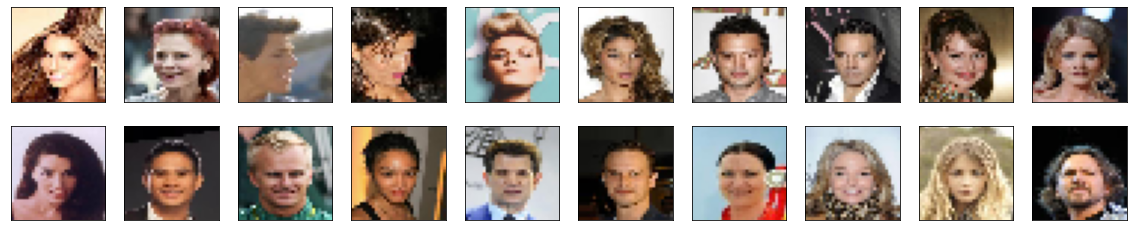

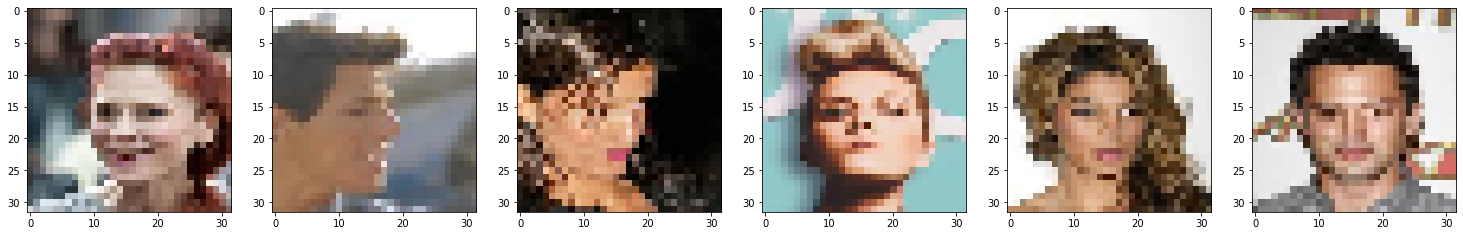

In [0]:
fig = plt.figure(figsize=(20,4))
num_img_plot = 20
for count in range(0,num_img_plot):
    ax = fig.add_subplot(2,num_img_plot/2,count+1,xticks=[], yticks=[])
    ax.imshow(X_train[count])
plt.show()
    
    
fig = plt.figure(figsize=(30,15))
plot_image = 7
for count in range(1,plot_image):
    ax = fig.add_subplot(1,plot_image,count)
    ax.imshow(X_train[count])
plt.show()

In [0]:
img_rows = 32
img_cols = 32
channels = 3

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
# Set the dimension of latent variables to be 100
z_dim = 100

## **Define Generator based on Sequential model**

In [0]:

# sequential modle

dim = 8
depth = 64+64+64+64
dropout = 0.4
def build_generator(z_dim):
    '''
    z_dim       : the dimension of the input vector for the generator
    img_shape   : the dimension of the output
    '''
    generator = Sequential()
    generator.add(Dense(z_dim, input_dim=z_dim))
    generator.add(Dense(dim*dim*depth, input_dim=z_dim))
    generator.add(BatchNormalization(momentum=0.9))
    generator.add(Activation('relu'))
    generator.add(Reshape((dim, dim, depth)))
    generator.add(Dropout(dropout))
    
    generator.add(UpSampling2D())
    generator.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
    generator.add(BatchNormalization(momentum=0.9))
    generator.add(Activation('relu'))

    generator.add(UpSampling2D())
    generator.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
    generator.add(BatchNormalization(momentum=0.9))
    generator.add(Activation('relu'))

    generator.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
    generator.add(BatchNormalization(momentum=0.9))
    generator.add(Activation('relu'))

    generator.add(Conv2DTranspose(3, 5, padding='same'))
    generator.add(Activation('sigmoid'))

    generator.summary() 
    return(generator)    


### **compile Generator model**

In [19]:
#optimizer = RMSprop(lr=0.0004, clipvalue=1.0, decay=3e-8)
optimizer = Adam(0.00007, 0.5)
z_dim = 100
generator = build_generator(z_dim)

generator.compile(loss='binary_crossentropy', optimizer=optimizer)









Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 16384)             1654784   
_________________________________________________________________
batch_normalization_1 (Batch (None, 16384)             65536     
_________________________________________________________________
activation_2 (Activation)    (None, 16384)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 25

In [0]:
print()

## **Define Discriminator based on Sequential model**


In [0]:

def build_discriminator(img_shape,noutput=1):
    depth =64
    dropout = 0.4
    discriminator = Sequential()

    input_shape = (32, 32, 3)

    discriminator.add(Conv2D(depth*1, 5, strides=1, 
                             input_shape=img_shape,padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))

    discriminator.add(Conv2D(depth*2, 5, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))

    discriminator.add(Conv2D(depth*4, 5, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))

    discriminator.add(Conv2D(depth*8, 5, strides=1, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))

    discriminator.add(Flatten())
    discriminator.add(Dense(1000))
    discriminator.add(Dense(noutput))
    discriminator.add(Activation('sigmoid'))

    discriminator.summary()
   
    return (discriminator)


### **Compile discriminator model**

In [21]:

#optimizer = RMSprop(lr=0.0008, clipvalue=1.0, decay=6e-8)

discriminator  = build_discriminator(img_shape)
discriminator.compile(loss      = 'binary_crossentropy', 
                      optimizer = optimizer,
                      metrics   = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)        

### **using function to define adversarial/gan model**

In [0]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [23]:
print(img_shape)
#print(noise_shape.shape)

(32, 32, 3)


**Import step : Keep Discriminator’s parameters constant for Generator training because we just want to updata generator in the initialize step**

**For the adversarial_model we will only train the generator**

In [0]:
discriminator.trainable = False

**The adversarial_model (stacked generator and discriminator) takes noise(z_dim) as input => generates images => determines validity** 

In [25]:
# Build the discriminator 
#discriminator = build_discriminator(img_shape)

# Build the Generator
#generator = build_generator(noise_shape)

# Build and compile GAN model with fixed Discriminator to train the Generator
adversarial_model = build_gan(generator, discriminator)
#optimizer = RMSprop(lr=0.0004, clipvalue=1.0, decay=3e-8)
adversarial_model.compile(loss='binary_crossentropy', 
                          optimizer=optimizer,
                          metrics=['accuracy'])
adversarial_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 32, 32, 3)         2809143   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 37076561  
Total params: 39,885,704
Trainable params: 2,775,927
Non-trainable params: 37,109,777
_________________________________________________________________


### **Define adversarial_model and compile**

In [0]:
optimizer = RMSprop(lr=0.0004, clipvalue=1.0, decay=3e-8)
discriminator.trainable = False
adversarial_model = Sequential()
adversarial_model.add(generator)
adversarial_model.add(discriminator)

adversarial_model.compile(loss='binary_crossentropy', 
                          optimizer=optimizer,
                          metrics=['accuracy'])
adversarial_model.summary()

In [0]:
z = layers.Input(shape=noise_shape)
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The valid takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity 
adversarial_model = models.Model(z, valid)
adversarial_model.compile(loss='binary_crossentropy', optimizer=optimizer)
adversarial_model.summary()

### **Define get_noise function. In other words this function aims to create random noise, which as an input to generator so it is very import step**

**noise_sample = 128 that's means according to np.random.normal() it can create a Normally distributed data with (128,100) shape**

In [0]:
def get_noise(noise_sample, nlatent_dim=z_dim):
    noise = np.random.normal(0, 1, size = [noise_sample,nlatent_dim])
    return(noise)

### **Define plot images function**

In [0]:
def plot_generated_images(noise,path_save=None,titleadd=""):
    imgs = generator.predict(noise)
    fig = plt.figure(figsize=(20,4))
    #nplot = 20
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(2,nsample/2,i+1,xticks=[], yticks=[])
        ax.imshow(img)
    fig.suptitle("Generated images "+titleadd,fontsize=30)
    
    if path_save is not None:
        plt.savefig(path_save,
                    bbox_inches='tight',
                    pad_inches=0)
        plt.close()
    else:
        plt.show()

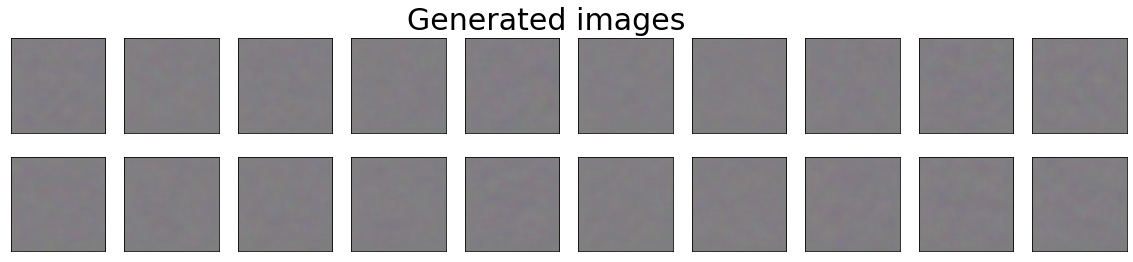

In [28]:
nsample = 20
noise = get_noise(noise_sample=nsample, nlatent_dim=z_dim)
plot_generated_images(noise)

In [29]:
print(noise)
print(noise.shape)

[[-0.69815914  1.72582874 -0.27156697 ... -0.14830647  0.16386194
   0.36685714]
 [ 2.07231369 -0.19360019 -0.64520213 ... -1.62984014 -0.88939507
   1.5462401 ]
 [-0.54435089 -0.29816638  0.8534816  ... -1.27056229 -0.00801838
   0.3008859 ]
 ...
 [ 1.61969457 -0.74851992  0.3342202  ... -1.16428994 -0.97997539
   2.2843504 ]
 [-0.17027908 -0.36922939  0.21694552 ...  1.2148534   0.98654749
  -1.07706849]
 [-0.74721427 -1.04745862 -0.0596855  ... -1.61316304  1.64256336
   0.99497635]]
(20, 100)


# **Train adversraial model**

In [0]:

def train(models, X_train, dir_result, epochs=10000, batch_size=128):
        '''
        models     : tuple containins three tensors, (combined, discriminator, generator)
        X_train    : np.array containing images (Nsample, height, width, Nchannels)
        noise_plot : np.array of size (Nrandom_sample_to_plot, hidden unit length)
        dir_result : the location where the generated plots for noise_plot are saved 
        
        '''
        combined, discriminator, generator = models
        
        
        #nlatent_dim = noise.shape[1]
        nlatent_dim = 100
        half_batch  = int(batch_size / 2)
        history = []
        
        discriminator_losses = []
        adversarial_losses = []
        sample_images = []
        
        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]
            noise = get_noise(half_batch, nlatent_dim)
            
             # Generate a half batch of new images
            gen_imgs = generator.predict(noise)

            
            # Train the discriminator q: better to mix them together?
            d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
            d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            # ---------------------
            #  Train Generator
            # ---------------------

            noise = get_noise(batch_size, nlatent_dim)

            # The generator wants the discriminator to label the generated samples
            # as valid (ones)
            valid_y = (np.array([1] * batch_size)).reshape(batch_size,1)
            
            # Train the generator
            g_loss = combined.train_on_batch(noise, valid_y)

            history.append({"D":d_loss[0],"G":g_loss})
            
            discriminator_losses.append(d_loss)
            adversarial_losses.append(g_loss)
            
            if epoch % 100 == 0:
                
                # noise shape(128,100) value range from (-1.0,1.0)
                noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
                fake_images = generator.predict(noise)
                sample_images.append(fake_images[0])
            
            if epoch % 100 == 0:
                print('====')
                # Plot the progress
                print ("Epoch {} [D loss: {}, acc.: {}%] [G loss: {}]".format(
                    epoch, d_loss[0], 100*d_loss[1], g_loss))
                               # Plot the progress
#                 print (" %05.0f [D loss: %4.3f, acc.: %.2f%%] [G loss: %4.3f]" % (
#                     epoch, d_loss[0], 100*d_loss[1], g_loss))

            if epoch % int(epochs/100) == 0:
                plot_generated_images(noise[0:20,:],
                                      path_save=dir_result+"/image_{}.png".format(epoch),
                                      titleadd="Epoch {}".format(epoch))
                
            if epoch % 1000 == 0:
                plot_generated_images(noise[0:20,:],
                                      titleadd="Epoch {}".format(epoch))
                        
        return history,discriminator_losses, adversarial_losses, sample_images


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


====
Epoch 0 [D loss: 1.5096218585968018, acc.: 15.625%] [G loss: [0.39110744, 1.0]]


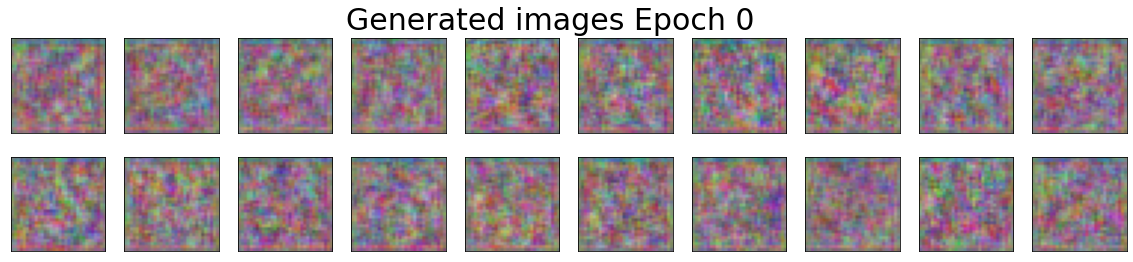

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


====
Epoch 100 [D loss: 0.9761486649513245, acc.: 40.625%] [G loss: [2.631425, 0.0]]
====
Epoch 200 [D loss: 0.5074753761291504, acc.: 83.59375%] [G loss: [1.1622636, 0.015625]]
====
Epoch 300 [D loss: 0.2677195072174072, acc.: 95.3125%] [G loss: [0.7456633, 0.53125]]
====
Epoch 400 [D loss: 0.3280516266822815, acc.: 87.5%] [G loss: [1.2721112, 0.125]]
====
Epoch 500 [D loss: 0.5168105363845825, acc.: 74.21875%] [G loss: [2.116142, 0.03125]]
====
Epoch 600 [D loss: 0.09148025512695312, acc.: 98.4375%] [G loss: [0.20292933, 0.9453125]]
====
Epoch 700 [D loss: 0.037197455763816833, acc.: 100.0%] [G loss: [0.51969653, 0.796875]]
====
Epoch 800 [D loss: 0.17657148838043213, acc.: 96.09375%] [G loss: [3.6984217, 0.0]]
====
Epoch 900 [D loss: 0.11960762739181519, acc.: 96.875%] [G loss: [5.9106073, 0.0]]
====
Epoch 1000 [D loss: 0.08290571719408035, acc.: 96.875%] [G loss: [5.517358, 0.0]]


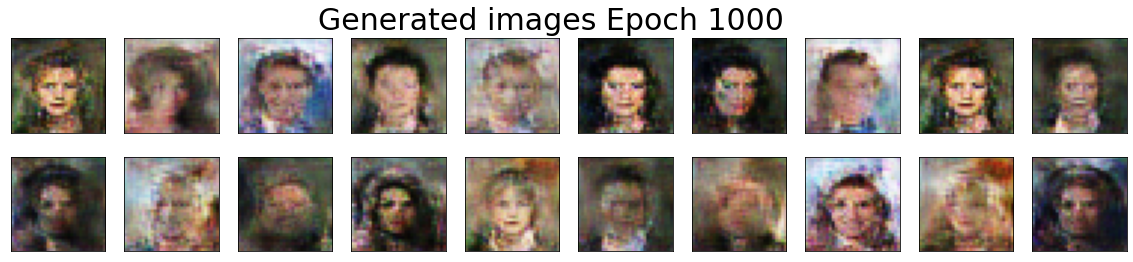

====
Epoch 1100 [D loss: 0.06839311867952347, acc.: 97.65625%] [G loss: [5.9013577, 0.0]]
====
Epoch 1200 [D loss: 0.06183721125125885, acc.: 97.65625%] [G loss: [6.713069, 0.0078125]]
====
Epoch 1300 [D loss: 0.15157866477966309, acc.: 95.3125%] [G loss: [7.5015273, 0.0078125]]
====
Epoch 1400 [D loss: 0.0469045490026474, acc.: 98.4375%] [G loss: [7.062581, 0.0]]
====
Epoch 1500 [D loss: 0.023460103198885918, acc.: 100.0%] [G loss: [7.1943245, 0.0078125]]
====
Epoch 1600 [D loss: 0.023234598338603973, acc.: 100.0%] [G loss: [8.853108, 0.0]]
====
Epoch 1700 [D loss: 0.07415542006492615, acc.: 96.875%] [G loss: [8.866805, 0.0]]
====
Epoch 1800 [D loss: 0.10989870131015778, acc.: 96.875%] [G loss: [7.9572983, 0.0078125]]
====
Epoch 1900 [D loss: 0.023409396409988403, acc.: 99.21875%] [G loss: [7.0301933, 0.0]]
----------
Time took: 9.43 min


In [31]:
dir_result="/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/sequtnetial_model_result_GAN"

try:
    os.mkdir(dir_result)
except:
    pass
    
start_time = time.time()

_models = adversarial_model, discriminator, generator          
#noise_batch_size = 128
history,discriminator_losses, adversarial_losses, sample_images = train(_models, X_train, dir_result,epochs=2000, batch_size=128)
end_time = time.time()
print("-"*10)
print("Time took: {:4.2f} min".format((end_time - start_time)/60))

In [0]:
import pandas as pd 
hist = pd.DataFrame(history)
plt.figure(figsize=(20,5))
for colnm in hist.columns:
    plt.plot(hist[colnm],label=colnm)
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()


In [0]:
dir_result = '/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/save_model'
def makegif(dir_result):
    import imageio
    filenames = np.sort(os.listdir(dir_result))
    filenames = [ fnm for fnm in filenames if ".png" in fnm]

    with imageio.get_writer(dir_result + '/image.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(dir_result + filename)
            writer.append_data(image)
            os.remove(dir_result + filename)
            
makegif(dir_result)

## **Plot Evolution of Generated Images (Ones)**

In [36]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

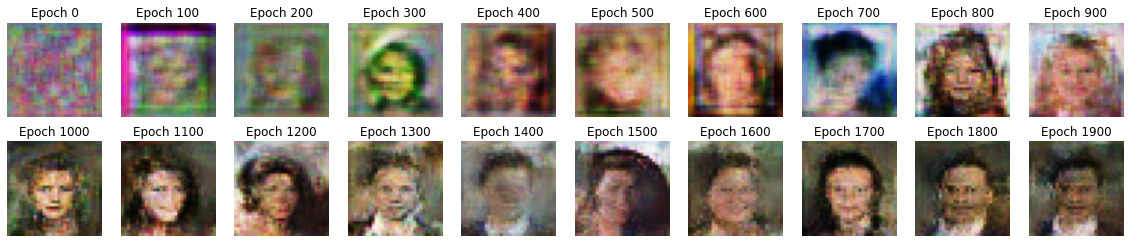

In [38]:
plt.figure(figsize=(20,4))
for epoch, fake_image in enumerate(sample_images, 0):
    plt.subplot(2, 10, epoch+1)
    plt.imshow(fake_image)
    plt.title("Epoch %d" % (epoch * 100))
    plt.axis('off')

## **Plot Training History**

Text(0.5, 1.0, 'Adversarial Accuracy')

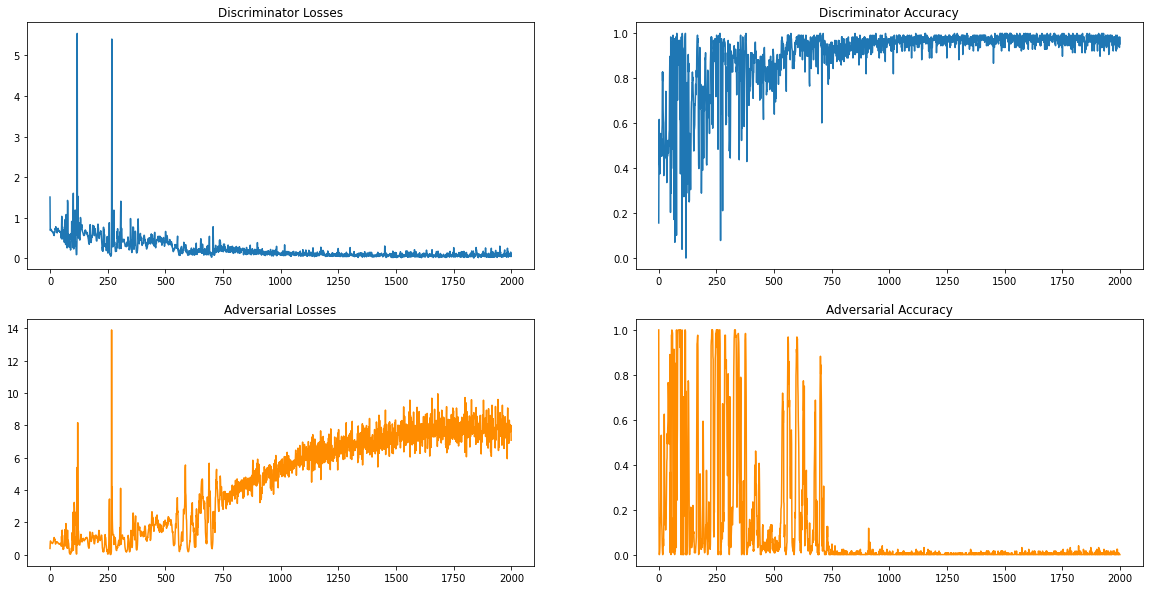

In [39]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(np.array(discriminator_losses)[:, 0])
plt.title("Discriminator Losses")

plt.subplot(2,2,2)
plt.plot(np.array(discriminator_losses)[:, 1])
plt.title("Discriminator Accuracy")

plt.subplot(2,2,3)
plt.plot(np.array(adversarial_losses)[:, 0], color='darkorange')
plt.title("Adversarial Losses")

plt.subplot(2,2,4)
plt.plot(np.array(adversarial_losses)[:, 1], color='darkorange')
plt.title("Adversarial Accuracy")

## **Generating Images**

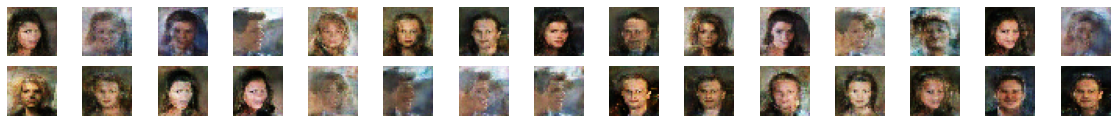

In [40]:
noise = np.random.uniform(-1.0, 1.0, size=[30, 100])
fake_images = generator.predict(noise)

plt.figure(figsize=(20,2))
for epoch, fake_image in enumerate(fake_images, 1):
    plt.subplot(2, 15, epoch)
    plt.imshow(fake_image)
    plt.axis('off')

## **Save model**

In [0]:
#combined, discriminator, generator
adversarial_model.save('/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/save_model/adversarial_model_2000.h5')
discriminator.save('/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/save_model/discriminator_2000.h5')
generator.save('/content/drive/My Drive/Colab Notebooks/Machine_Learning/GAN_sample/datasets/save_model/generator_2000.h5')

# **In order to understand train step, I writet this section, to run each code this is best way to understant the whole process**

### **get noise**

In [0]:
nsample = 20
z_dim = 100
noise = get_noise(noise_sample=nsample,nlatent_dim=z_dim)

In [51]:
print(noise.shape)

(20, 100)


In [0]:
noise1 = np.random.normal(0,1,size=[nsample,nlatent_dim])

In [54]:
print(noise1.shape)
print(type(noise))
print(noise1)

(20, 100)
<class 'numpy.ndarray'>
[[ 1.18918924  1.79137377 -0.09194829 ... -0.20826346  2.07196523
   0.39886391]
 [-0.6406053   0.01541347 -0.57696667 ...  0.00674835 -1.083498
   0.39607084]
 [ 1.95894137 -0.93962183  0.19695055 ...  0.51530345 -0.9483209
   0.98801104]
 ...
 [-0.15252386  0.92967477 -0.06422157 ...  0.5642875   0.10852832
   1.12522335]
 [ 0.91177512  0.73385212  1.13451074 ... -0.88463393  0.89880795
  -1.04222073]
 [ 1.81995621  1.99321801 -0.6540255  ...  1.7838224  -2.21647001
  -1.05049391]]


### **begin train process let's get into def train to see what happen actually**

In [0]:
batch_size = 128
nlatent_dim = 100
half_batch  = int(batch_size / 2)
history = []
        
discriminator_losses = []
adversarial_losses = []
sample_images = []

**select random half_batch images from real dataset**

In [58]:
print(X_train.shape)
print(X_train.shape[0])

(40, 32, 32, 3)
40


## **Train Discriminator**

**create random sequence , aimming to select random half batch size real data from real dataset,this will be the real data input to discriminator**

In [0]:
idx = np.random.randint(0,X_train.shape[0],half_batch)

In [61]:
print(idx.shape)
print(type(idx))
print(idx)

(64,)
<class 'numpy.ndarray'>
[30  6  1 15 12 38 31  9  1 35 11 27 14 22 26 23 32  5 28 27 22 13 22 19
 32 11 15 28 38 29 34  1  5 20 15 22  9 21  7 16 23  3  3 13 33 29 12 35
 14  2 34 26 37 20 35 18 27 17 10 37 14 13  9 34]


In [0]:
images_train = X_train[idx]

In [64]:
print(images_train.shape)
print(type(images_train))
print(images_train[0])

(64, 32, 32, 3)
<class 'numpy.ndarray'>
[[[0.57254905 0.5254902  0.42352942]
  [0.5764706  0.5294118  0.42745098]
  [0.6039216  0.5568628  0.45490196]
  ...
  [0.5411765  0.39215687 0.24705882]
  [0.4509804  0.4        0.27450982]
  [0.4627451  0.45882353 0.38039216]]

 [[0.57254905 0.5254902  0.42352942]
  [0.5764706  0.5294118  0.42745098]
  [0.6039216  0.5568628  0.45490196]
  ...
  [0.5411765  0.39215687 0.24705882]
  [0.4509804  0.4        0.27450982]
  [0.4627451  0.45882353 0.38039216]]

 [[0.57254905 0.5254902  0.42352942]
  [0.5764706  0.5294118  0.42745098]
  [0.6039216  0.5568628  0.45490196]
  ...
  [0.5372549  0.3882353  0.24313726]
  [0.4509804  0.4        0.27450982]
  [0.4627451  0.45882353 0.38039216]]

 ...

 [[0.09803922 0.10196079 0.08235294]
  [0.09803922 0.09803922 0.09019608]
  [0.11764706 0.11764706 0.1254902 ]
  ...
  [0.7372549  0.7294118  0.68235296]
  [0.7921569  0.7647059  0.69411767]
  [0.6901961  0.6509804  0.5529412 ]]

 [[0.10980392 0.1254902  0.1372549

**get noise. noise shape is (64,100) as input to generator**

In [0]:
noise = get_noise(half_batch,nlatent_dim)

In [66]:
print(noise.shape)
print(type(noise))
print(noise)

(64, 100)
<class 'numpy.ndarray'>
[[ 0.18664689  0.85736413 -0.85090755 ... -0.69647255  0.61564467
  -0.31823388]
 [-1.51042259 -0.8665426   0.22204278 ...  0.37332569 -0.71658638
  -0.47442952]
 [ 1.86216053 -1.37547538 -0.24258333 ... -1.32045142 -1.48965113
   0.52840334]
 ...
 [ 2.17484589  0.71042311 -0.08574392 ... -0.56687411  0.59904641
   1.35011109]
 [ 0.32838153 -0.11398645  0.13457199 ... -0.8869963   0.87972207
  -0.24160398]
 [-0.62436611  0.58429247 -0.4059181  ... -2.12514333  0.23908353
  -0.20128902]]


**this step is to get generate images (fake images) from generator one more thing this input is noise**

In [0]:
gen_imgs = generator.predict(noise)

In [69]:
print(gen_imgs.shape)
print(type(gen_imgs))
#print(gen_imgs)

(64, 32, 32, 3)
<class 'numpy.ndarray'>


**Train the discriminator  question: better to mix them together**

**set real_label is (64,1) all label is one**

**set fake_label is (64,1) all label is zero**

In [0]:
real_label = np.ones((half_batch,1))
fake_label = np.zeros((half_batch,1),dtype = float)

In [76]:
print(real_label.shape)
print(type(real_label))
print(real_label)
print('=========')
print(fake_label.shape)
print(type(fake_label))
print(fake_label)

(64, 1)
<class 'numpy.ndarray'>
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(64, 1)
<class 'numpy.ndarray'>
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


**put half batch size of real data and real_label into discriminator to let D know what is real data**

In [77]:
d_loss_real = discriminator.train_on_batch(images_train,real_label)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


**put half batch size of fake data and fake_label into discriminator to let D know what is fake data**

In [78]:
d_loss_fake = discriminator.train_on_batch(gen_imgs,fake_label)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


**first number is loss ,and second number is accuracy.For d_loss_real that's mean D can identify real data 100%. For d_loss_fake that's mean D can identify fake data 98%**

In [80]:
#print(d_loss_real.shape)
print(type(d_loss_real))
print(d_loss_real)
print('===========')
#print(d_loss_fake.shape)
print(type(d_loss_fake))
print(d_loss_fake)

<class 'list'>
[0.017551487, 1.0]
<class 'list'>
[0.22451533, 0.984375]


**test the probability of fake and real after D**

In [0]:
probability_after_D_sigmoid_real = discriminator.predict(images_train)

In [0]:
probability_after_D_sigmoid_fake = discriminator.predict(gen_imgs)

In [84]:
print(type(probability_after_D_sigmoid_real))
print(probability_after_D_sigmoid_real.shape)

<class 'numpy.ndarray'>
(64, 1)


In [85]:
print(probability_after_D_sigmoid_real)

[[0.9999959 ]
 [0.99999994]
 [0.9999999 ]
 [0.9999938 ]
 [0.9999995 ]
 [0.9999993 ]
 [1.        ]
 [0.99999887]
 [0.9999999 ]
 [0.9999963 ]
 [0.9999977 ]
 [0.99999976]
 [0.9999994 ]
 [0.99999994]
 [0.9999987 ]
 [1.        ]
 [0.99999976]
 [0.9999999 ]
 [0.9999988 ]
 [0.99999976]
 [0.99999994]
 [0.99999964]
 [0.99999994]
 [0.9999999 ]
 [0.99999976]
 [0.9999977 ]
 [0.9999938 ]
 [0.9999988 ]
 [0.9999993 ]
 [0.99999994]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999938 ]
 [0.99999994]
 [0.99999887]
 [0.9999968 ]
 [0.9999998 ]
 [1.        ]
 [1.        ]
 [0.9999995 ]
 [0.9999995 ]
 [0.99999964]
 [0.9999983 ]
 [0.99999994]
 [0.9999995 ]
 [0.9999963 ]
 [0.9999994 ]
 [0.99939585]
 [0.9999999 ]
 [0.9999987 ]
 [0.99999976]
 [0.9999999 ]
 [0.9999963 ]
 [0.99999964]
 [0.99999976]
 [0.9999997 ]
 [0.9999989 ]
 [0.99999976]
 [0.9999994 ]
 [0.99999964]
 [0.99999887]
 [0.9999999 ]]


In [86]:
print(probability_after_D_sigmoid_fake)

[[0.95669353]
 [0.99165606]
 [0.15988156]
 [0.03593853]
 [0.37791023]
 [0.1790967 ]
 [0.00367597]
 [0.6105702 ]
 [0.03078479]
 [0.00436237]
 [0.10311568]
 [0.03335935]
 [0.02876937]
 [0.00251749]
 [0.00275299]
 [0.95899683]
 [0.28371787]
 [0.01175079]
 [0.850142  ]
 [0.35176063]
 [0.00160185]
 [0.95376587]
 [0.15454262]
 [0.17835501]
 [0.00988019]
 [0.02664384]
 [0.06468832]
 [0.00779343]
 [0.02080423]
 [0.00483918]
 [0.87041456]
 [0.9992912 ]
 [0.9796345 ]
 [0.02186882]
 [0.87012756]
 [0.3391279 ]
 [0.9185672 ]
 [0.19060838]
 [0.08693197]
 [0.01588228]
 [0.01877061]
 [0.10323384]
 [0.03724086]
 [0.00996691]
 [0.01683241]
 [0.01404926]
 [0.98802406]
 [0.02160147]
 [0.00367653]
 [0.00710288]
 [0.06788826]
 [0.03326923]
 [0.07806215]
 [0.23339123]
 [0.00502166]
 [0.09255514]
 [0.05278325]
 [0.73232836]
 [0.02007258]
 [0.12753195]
 [0.00627995]
 [0.27210212]
 [0.05387777]
 [0.45471683]]


**So far we have d_loss_real and d_loss_fake, so we need combine them together ,that's whole batch size.So we can achieve our goal.**

**So far we input half real data from real dataset and input half fake image get from Generator generated from noise, so right now,our D can know which is real data and which is fake data**

In [0]:
d_loss = 0.5*np.add(d_loss_real,d_loss_fake)

In [91]:
print(d_loss.shape)
print(type(d_loss))
print(d_loss)

(2,)
<class 'numpy.ndarray'>
[0.12103341 0.9921875 ]


## **Train Generator**

**now we have already trained D and good enough to identify which is true or false, so we should let's our G become stronger**

**Createing whole batch size of noise**

**All of batch size data will be used to train adversarial model (actually in other words is train G because in adversrial model D is frozen just need update G)**

In [0]:
noise = get_noise(batch_size,nlatent_dim)

In [100]:
print(noise.shape)
print(type(noise))
print(noise)

(128, 100)
<class 'numpy.ndarray'>
[[ 4.51799579e-01 -9.96180093e-01  2.25569396e-03 ... -3.99826966e-01
   3.22684858e-02  9.40284689e-01]
 [-6.88207109e-01  5.85883458e-01  1.03343337e+00 ... -1.72051839e+00
  -1.68465553e+00  4.08521803e-01]
 [-1.00588742e+00 -1.40735032e-01 -1.49651709e-01 ...  5.20667337e-01
  -8.33802613e-01 -2.34866173e+00]
 ...
 [-6.79835606e-01  3.59726866e-01 -1.74819348e+00 ...  8.91463537e-01
  -2.13897766e+00  2.44352752e+00]
 [ 1.45666509e-01 -6.25895749e-01  1.09190387e-01 ... -2.95587556e-01
   9.86558264e-01 -5.44321772e-01]
 [ 1.18122116e+00 -4.25922827e-01  7.79280680e-01 ...  1.31598525e+00
   1.40291943e+00  2.70203986e-01]]


**Generator(adversrailal) model wants the discrminator to label the generated samples as vaild(one)**

**(128,) ====> (128,1)**

In [0]:
valid_y = np.array([1]*batch_size)
valid_y = valid_y.reshape(batch_size,1)

In [102]:
print(valid_y.shape)
print(type(valid_y))
print(valid_y)

(128, 1)
<class 'numpy.ndarray'>
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


**now we need train adversarial model**

**in other expirement g_loss is g_loss [0.29064804, 0.984375]**

In [0]:
g_loss = adversarial_model.train_on_batch(noise,valid_y)

In [105]:
#print(g_loss.shape)
print(type(g_loss))
print(g_loss)

<class 'list'>
[7.8576303, 0.0078125]


## **Now we finished one epoch D and A training**

**appedn g_loss and d_loss into list**

In [0]:
history.append({'D':d_loss[0],'G':g_loss})

In [108]:
print(history)
print(type(history))

[{'D': 0.12103341, 'G': [7.8576303, 0.0078125]}]
<class 'list'>


In [0]:
discriminator_losses.append(d_loss)
adversarial_losses.append(g_loss)

In [111]:
print(type(discriminator_losses))
#print(discriminator_losses.shape)
print(discriminator_losses)
print('======================')
print(type(adversarial_losses))
#print(adversarial_losses.shape)
print(adversarial_losses)

<class 'list'>
[array([0.12103341, 0.9921875 ], dtype=float32)]
<class 'list'>
[[7.8576303, 0.0078125]]


In [112]:
print ("Epoch {} [D loss: {}, acc.: {}%] [G loss: {}]".format(
                    epoch, d_loss[0], 100*d_loss[1], g_loss))

Epoch 30 [D loss: 0.12103340774774551, acc.: 99.21875%] [G loss: [7.8576303, 0.0078125]]


## **every 100 epoch select one sample_images (fake_images[0],(32,32,3)**

In [0]:
fake_images = generator.predict(noise)

In [115]:
print(fake_image.shape)
print(type(fake_images))
print(fake_images[0])

(32, 32, 3)
<class 'numpy.ndarray'>
[[[0.42669773 0.36960357 0.3580491 ]
  [0.39122927 0.35183978 0.2983111 ]
  [0.38635612 0.34285587 0.24599487]
  ...
  [0.1354053  0.15599376 0.13758451]
  [0.16655862 0.19184709 0.1398879 ]
  [0.24069646 0.21022147 0.17786857]]

 [[0.38389957 0.37441945 0.30484527]
  [0.41562665 0.37504914 0.348654  ]
  [0.36714208 0.41684166 0.37550628]
  ...
  [0.17281148 0.18215501 0.13390845]
  [0.14987457 0.14867526 0.11706999]
  [0.18779895 0.22174087 0.1734227 ]]

 [[0.29865956 0.3580607  0.28093553]
  [0.35843614 0.3487699  0.27698195]
  [0.3595018  0.39914203 0.35189402]
  ...
  [0.20056948 0.20222595 0.19464359]
  [0.22939134 0.17503506 0.18117103]
  [0.1891424  0.17032269 0.19500649]]

 ...

 [[0.08256257 0.0467681  0.03165957]
  [0.10636663 0.09176847 0.02541438]
  [0.11048812 0.04639632 0.04913139]
  ...
  [0.18157336 0.17172202 0.23537967]
  [0.1764383  0.22157672 0.20330748]
  [0.23966756 0.23079112 0.25799203]]

 [[0.08936539 0.04150558 0.03652996]
 

In [117]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

plt.figure(figsize=(20,4))
for epoch, fake_image in enumerate(sample_images, 0):
    plt.subplot(2, 10, epoch+1)
    plt.imshow(fake_image)
    plt.title("Epoch %d" % (epoch * 100))
    plt.axis('off')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Adversarial Accuracy')

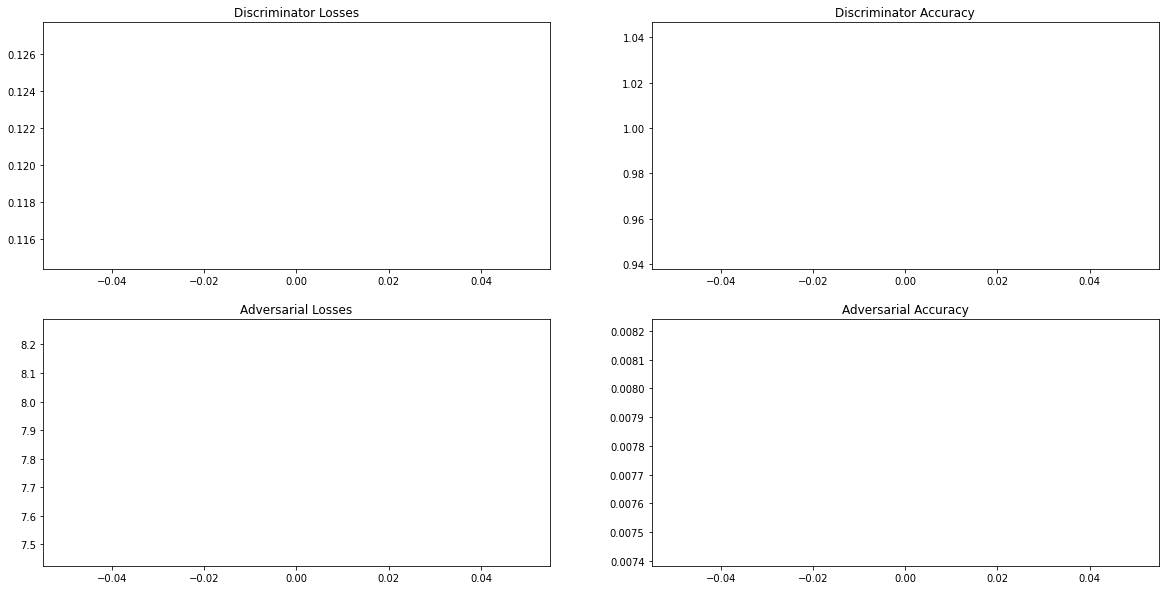

In [118]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(np.array(discriminator_losses)[:, 0])
plt.title("Discriminator Losses")

plt.subplot(2,2,2)
plt.plot(np.array(discriminator_losses)[:, 1])
plt.title("Discriminator Accuracy")

plt.subplot(2,2,3)
plt.plot(np.array(adversarial_losses)[:, 0], color='darkorange')
plt.title("Adversarial Losses")

plt.subplot(2,2,4)
plt.plot(np.array(adversarial_losses)[:, 1], color='darkorange')
plt.title("Adversarial Accuracy")

## **Below is script of normal version**

In [42]:
noise.shape[1]
nlatent_dim=noise.shape[1]
print(nlatent_dim)
print(X_train.shape)

100
(40, 32, 32, 3)


In [0]:
idx = np.random.randint(0,X_train.shape[0],64)
print(idx)

[14  2 24 33 27 20 22 29 27 25  9 17 21 21 23 30 17  6 19 36 23 21  7 14
 10 31 37 23 27 20 27 10 12 37 38 11 31 13 33  7 38 13 22 22  7 11 35 30
  6 28 19 18 10  8  1 34  7 28 20 15 12 30 12 24]


In [0]:
imgs = X_train[idx]

In [0]:
print(len(imgs))
print(imgs.shape)

64
(64, 32, 32, 3)


In [0]:
print(nlatent_dim)
batch_size= 128
half_batch = int(batch_size / 2)

100


In [0]:
noise = get_noise(half_batch,nlatent_dim)

In [0]:
print(noise.shape)

(64, 100)


In [0]:
gen_imgs = generator.predict(noise)

In [0]:
pro = discriminator.predict(imgs)
pro_fake = discriminator.predict(gen_imgs)

In [0]:
print(pro_fake.shape)
print(pro_fake)

(64, 1)
[[4.8975769e-01]
 [3.4303397e-02]
 [3.1156608e-01]
 [3.0869693e-02]
 [2.0607263e-01]
 [1.0359451e-01]
 [4.2467666e-01]
 [8.6606383e-02]
 [2.5848800e-01]
 [4.2511076e-02]
 [2.2451875e-01]
 [4.4092119e-02]
 [1.4519507e-01]
 [4.3755174e-03]
 [3.8284481e-02]
 [1.8359452e-01]
 [4.8853499e-01]
 [4.1256309e-02]
 [2.5534630e-04]
 [2.5925556e-01]
 [2.8312206e-02]
 [2.1753848e-02]
 [2.1179837e-01]
 [2.4489960e-01]
 [3.8113892e-02]
 [3.2271975e-01]
 [3.0809924e-01]
 [3.9999595e-01]
 [3.6329097e-01]
 [7.1915090e-03]
 [3.0805346e-01]
 [6.4503467e-01]
 [4.3095258e-01]
 [1.2977061e-01]
 [2.8166592e-02]
 [1.6426474e-02]
 [3.3927178e-01]
 [5.3191662e-02]
 [2.5385630e-01]
 [2.8407145e-01]
 [6.4187348e-02]
 [1.5205449e-01]
 [8.2379937e-02]
 [6.0018128e-01]
 [4.1836876e-01]
 [5.3394318e-02]
 [3.6239624e-04]
 [6.4016312e-02]
 [8.2051486e-02]
 [1.5317762e-01]
 [2.3873666e-01]
 [1.1449516e-01]
 [3.9812922e-03]
 [8.9566112e-03]
 [1.0312179e-01]
 [5.4281181e-01]
 [2.1822453e-03]
 [3.6830318e-01]
 [6.76

In [0]:
print(pro)
print(pro.shape)

[[0.98842835]
 [0.84248006]
 [0.8619205 ]
 [0.9384877 ]
 [0.9132836 ]
 [0.95589143]
 [0.99083394]
 [0.8973273 ]
 [0.9132836 ]
 [0.94021976]
 [0.9335946 ]
 [0.95555115]
 [0.8573761 ]
 [0.8573761 ]
 [0.77003765]
 [0.9301356 ]
 [0.95555115]
 [0.9968933 ]
 [0.98092616]
 [0.46403286]
 [0.77003765]
 [0.8573761 ]
 [0.9754975 ]
 [0.98842835]
 [0.95766544]
 [0.9849355 ]
 [0.9899305 ]
 [0.77003765]
 [0.9132836 ]
 [0.95589143]
 [0.9132836 ]
 [0.95766544]
 [0.8831221 ]
 [0.9899305 ]
 [0.9697331 ]
 [0.97663677]
 [0.9849355 ]
 [0.8845173 ]
 [0.9384877 ]
 [0.9754975 ]
 [0.9697331 ]
 [0.8845173 ]
 [0.99083394]
 [0.99083394]
 [0.9754975 ]
 [0.97663677]
 [0.8238811 ]
 [0.9301356 ]
 [0.9968933 ]
 [0.94143546]
 [0.98092616]
 [0.76168776]
 [0.95766544]
 [0.9659638 ]
 [0.94176215]
 [0.99415153]
 [0.9754975 ]
 [0.94143546]
 [0.95589143]
 [0.9388939 ]
 [0.8831221 ]
 [0.9301356 ]
 [0.8831221 ]
 [0.8619205 ]]
(64, 1)


In [0]:
print(type(gen_imgs))
print(gen_imgs.shape)
print(gen_imgs[0])

<class 'numpy.ndarray'>
(64, 32, 32, 3)
[[[0.7403463  0.5202784  0.6546051 ]
  [0.87006414 0.6141912  0.3278114 ]
  [0.7045138  0.7123053  0.16181403]
  ...
  [0.571939   0.6434143  0.17913285]
  [0.50835437 0.58331746 0.18427938]
  [0.46955115 0.52441263 0.17385748]]

 [[0.8358455  0.6957813  0.6704406 ]
  [0.910728   0.65749645 0.5176878 ]
  [0.8077679  0.6885409  0.41642368]
  ...
  [0.4622422  0.41707557 0.3247713 ]
  [0.35753042 0.42729872 0.34346282]
  [0.350945   0.42672932 0.25731558]]

 [[0.6637016  0.7534547  0.34277296]
  [0.85534465 0.7153324  0.24318379]
  [0.6451824  0.7675848  0.2677557 ]
  ...
  [0.38022423 0.46258935 0.3058714 ]
  [0.23747045 0.49778888 0.30923957]
  [0.22118858 0.5520935  0.31519073]]

 ...

 [[0.42780688 0.31552178 0.13706538]
  [0.40921122 0.20565385 0.1886256 ]
  [0.20482114 0.24268192 0.12344977]
  ...
  [0.43279567 0.38976234 0.12098214]
  [0.32267952 0.3340801  0.27175885]
  [0.36358404 0.22978109 0.43161243]]

 [[0.3778007  0.2758456  0.2325286

In [0]:
history = []
discriminator_losses = []
adversarial_losses = []
sample_images = []
        

In [0]:
real_label = np.ones((half_batch,1),dtype=float)
fake_label = np.zeros((half_batch,1),dtype=float)

In [0]:
print(real_label.shape)
print(real_label)

print(fake_label.shape)
print(fake_label)

(64, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(64,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
d_loss_real = discriminator.train_on_batch(imgs,real_label)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
d_loss_fake = discriminator.train_on_batch(gen_imgs,fake_label)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
print(d_loss_real)
print(d_loss_fake)

[0.40708494, 0.859375]
[0.14939848, 0.984375]


In [0]:
d_loss = 0.5 * np.add(d_loss_real,d_loss_fake)

In [0]:
print(d_loss)

[0.2782417 0.921875 ]


#### **train generator**

In [0]:
noise = get_noise(batch_size,nlatent_dim)

In [0]:
print(noise.shape)

(128, 100)


In [0]:
temp = np.array([1] * batch_size)

In [0]:
print(temp.shape)
print(temp)

(128,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [0]:
temp_transpose = (np.array([1]*batch_size)).reshape(batch_size,1)
print(temp_transpose.shape)
print(temp_transpose)

(128, 1)
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [0]:
g_loss = adversarial_model.train_on_batch(noise,temp_transpose)

In [0]:
print(g_loss)


[0.29064804, 0.984375]


In [0]:
history.append({"D":d_loss[0],"G":g_loss})
            
discriminator_losses.append(d_loss)
adversarial_losses.append(g_loss)

In [0]:
print(discriminator_losses)
print(type(discriminator_losses))
print(adversarial_losses)
print(type(adversarial_losses))

[array([0.2782417, 0.921875 ], dtype=float32)]
<class 'list'>
[[0.29064804, 0.984375]]
<class 'list'>


In [0]:
temp_uniform = np.random.uniform(-1.0,1.0,size=[128,100])

In [0]:
print(temp_uniform.shape)

(128, 100)


In [0]:
print(temp_uniform)

[[-0.25993389  0.8745627   0.82841336 ...  0.12450275  0.40861586
  -0.71301312]
 [ 0.95938126  0.75552864 -0.65020846 ...  0.81213561  0.82909508
   0.18368049]
 [ 0.97200276  0.85699891 -0.97307088 ... -0.03763935 -0.11830301
  -0.56457785]
 ...
 [-0.94557104 -0.42182964  0.09805689 ...  0.41896067  0.42796372
  -0.16426178]
 [-0.12677848  0.52100038  0.57472926 ... -0.20162473 -0.74613692
   0.58943147]
 [-0.05183143  0.99399799 -0.01285757 ... -0.72545132  0.14238093
   0.83273917]]


In [0]:
fake_images = generator.predict(temp_uniform)

In [0]:
print(fake_images.shape)
#print(fake_images)
print(fake_images[127].shape)
print

(128, 32, 32, 3)
(32, 32, 3)


<function print>

In [0]:
sample_images.append(fake_images[0])

In [0]:
print ("Epoch {:05.0f} [D loss: {:4.3f}, acc.: {:05.1f}%] [G loss: {:4.3f}]".format(
                    1, d_loss[0], 100*d_loss[1], g_loss))


TypeError: ignored

In [0]:
print ("Epoch {:05.0f} [D loss: {:4.3f}, acc.: {:05.1f}%] [G loss: {:4.3f}]".format(
                    1, d_loss[0], 100*d_loss[1], g_loss))


TypeError: ignored

In [0]:
print ("Epoch {:05.0f} [D loss: {:4.3f}, acc.: {:05.1f}%] [G loss: {:4.3f}]".format(
                    100, d_loss[0], 100*d_loss[1], g_loss))


TypeError: ignored

In [0]:
array_print = 0.27824169397354126
print('array_print {:4.3f}'.format(array_print))

array_print 0.278


In [0]:
print('[D loss: {}, acc.: {}%] [G loss: {}]'.format(d_loss[0], 100*d_loss[1], g_loss))    # 输入结果：hello world i am python


[D loss: 0.27824169397354126, acc.: 92.1875%] [G loss: [0.29064804, 0.984375]]


In [0]:
a = [1, 2, 3]
print('{:1}'.format(a))


TypeError: ignored

In [0]:
print('{}'.format(a[:1]))

[1]


In [0]:
temp_batch_size = 4
input_labels = np.ones([2*temp_batch_size, 1])
input_labels[temp_batch_size:, :] = 0


In [0]:
print(input_labels.shape)

(8, 1)


In [0]:
print(input_labels[temp_batch_size:, :])

[[0.]
 [0.]
 [0.]
 [0.]]
